In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

In [50]:
df = pd.read_csv("65k.csv")

In [51]:
import time
start_time = time.time()

In [52]:
df

,datetime,close
0,2019-01-01 18:02:00,2501.25
1,2019-01-01 18:03:00,2504.50
2,2019-01-01 18:04:00,2508.50
3,2019-01-01 18:05:00,2507.25
4,2019-01-01 18:06:00,2507.50
...,...,...
65531,2019-03-11 06:27:00,2742.00
65532,2019-03-11 06:28:00,2741.75
65533,2019-03-11 06:29:00,2742.00
65534,2019-03-11 06:30:00,2742.00


In [53]:
df2 = df.set_index('datetime')

In [54]:
df2

,close
datetime,
2019-01-01 18:02:00,2501.25
2019-01-01 18:03:00,2504.50
2019-01-01 18:04:00,2508.50
2019-01-01 18:05:00,2507.25
2019-01-01 18:06:00,2507.50
...,...
2019-03-11 06:27:00,2742.00
2019-03-11 06:28:00,2741.75
2019-03-11 06:29:00,2742.00


In [55]:
df2['logReturn'] = np.log(df2.close/df2.close.shift(1))

In [56]:
df2['sqrd_return'] = df2['logReturn']**2

In [57]:
df2['abs_return'] = df2['logReturn'].abs()

In [58]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-03-11 06:27:00,2742.00,0.000000,0.000000e+00,0.000000
2019-03-11 06:28:00,2741.75,-0.000091,8.313516e-09,0.000091
2019-03-11 06:29:00,2742.00,0.000091,8.313516e-09,0.000091


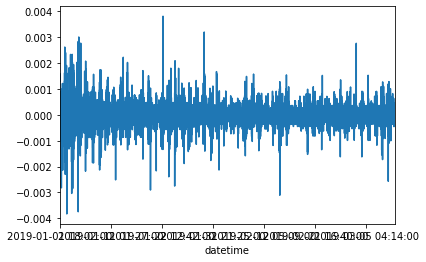

In [59]:
df2['logReturn'].plot()

In [60]:
def zscore(returns):
    return (returns-returns.mean())/np.std(returns)

In [61]:
normalized = zscore(df2.logReturn)

Text(0, 0.5, 'Normalized Returns')

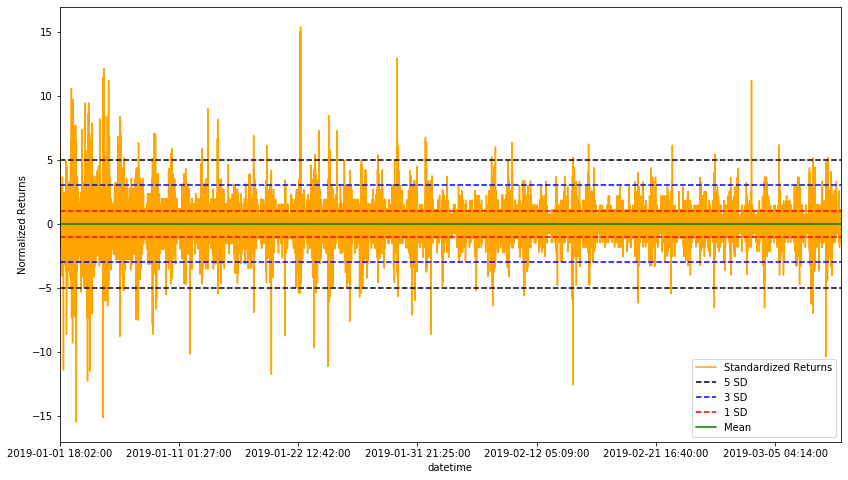

In [62]:
normalized.plot(figsize=(14,8),label='Standardized Returns',color='orange')
plt.axhline(normalized.std()*3,color='blue',ls='--')
plt.axhline(normalized.std()*5,color='black',ls='--')
plt.axhline(normalized.std()*-5,color='black',label='5 SD',ls='--')
plt.axhline(normalized.std()*-3,color='blue',label='3 SD',ls='--')
plt.axhline(normalized.std(),color='red',ls='--')
plt.axhline(normalized.std()*-1,color='red',ls='--',label='1 SD')
plt.axhline(normalized.mean(),color='green',label='Mean')
plt.legend()
plt.ylabel("Normalized Returns",size=10)

Text(0.5, 1.0, 'ACF LAG for Prices')

<Figure size 2160x1440 with 0 Axes>

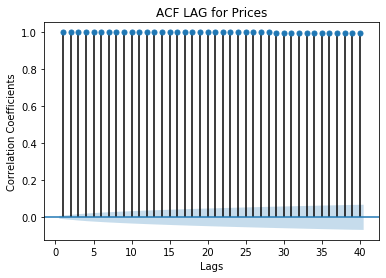

In [63]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.close,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Prices")

Text(0.5, 1.0, 'ACF LAG for Log Returns')

<Figure size 2160x1440 with 0 Axes>

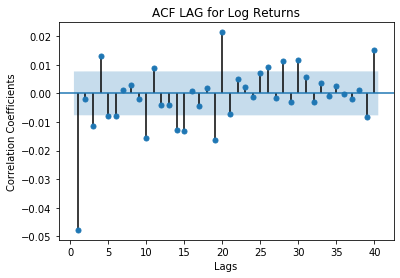

In [64]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.logReturn[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Log Returns")

Text(0.5, 1.0, 'ACF LAG for Squarred Log Returns')

<Figure size 2160x1440 with 0 Axes>

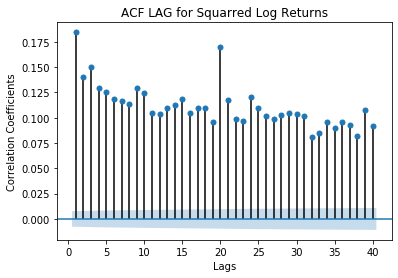

In [65]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.sqrd_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Squarred Log Returns")

In [66]:
#df2.to_csv("HFT_65536_Futures.csv")

Text(0.5, 1.0, 'ACF LAG for Absolute Log Returns')

<Figure size 2160x1440 with 0 Axes>

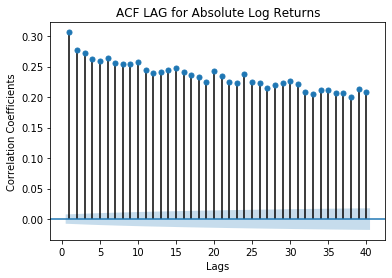

In [67]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.abs_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Absolute Log Returns")

In [68]:
s = pd.Series(df2['close'])

In [69]:
s.autocorr(lag=1)

0.9999751723486798

In [70]:
s.autocorr(lag=2) 

0.999952726793545

In [71]:
s.autocorr(lag=3) 

0.9999304786540636

In [72]:
s.autocorr(lag=4) 

0.9999087837907644

In [73]:
s.autocorr(lag=5)

0.9998864593691551

In [74]:
s = pd.Series(df2['logReturn'])

In [75]:
s.autocorr(lag=1)

-0.04776155364033535

In [76]:
s.autocorr(lag=2) 

-0.0021483164963718364

In [77]:
s.autocorr(lag=3) 

-0.01137348747485695

In [78]:
s.autocorr(lag=4) 

0.013144395868131278

In [79]:
s.autocorr(lag=5)

-0.007914675904581983

In [80]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-03-11 06:27:00,2742.00,0.000000,0.000000e+00,0.000000
2019-03-11 06:28:00,2741.75,-0.000091,8.313516e-09,0.000091
2019-03-11 06:29:00,2742.00,0.000091,8.313516e-09,0.000091


In [81]:
s = pd.Series(df2['sqrd_return'])

In [82]:
s.autocorr(lag=1)

0.18445494379378052

In [83]:
s.autocorr(lag=2) 

0.1401235439565107

In [84]:
s.autocorr(lag=3) 

0.15061096811843264

In [85]:
s.autocorr(lag=4) 

0.12984441601509147

In [86]:
s.autocorr(lag=5)

0.12559823572105658

In [87]:
s = pd.Series(df2['abs_return'])

In [88]:
s.autocorr(lag=1)

0.3064670435496884

In [89]:
s.autocorr(lag=2) 

0.2778133674726482

In [90]:
s.autocorr(lag=3) 

0.2726175218392138

In [91]:
s.autocorr(lag=4) 

0.2621305106313862

In [92]:
s.autocorr(lag=5)

0.25863949924015844

In [93]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 29.544095039367676 seconds ---
